<a href="https://colab.research.google.com/github/senthilanan2016/CodSoft/blob/main/Task_5_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Task-5 - Credit Card Fraud Detection**

## **Introduction:**
In the world of money safety, spotting credit card fraud is crucial for keeping both individuals and businesses secure. With digital payments growing, the demand for smart ways to catch fraudsters is higher than ever. This project dives into the world of machine learning to spot fake credit card transactions. By doing this, it helps stop potential financial losses and makes our transactions safer.

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Task5/creditcard.csv')
pd.options.display.max_columns=None

## **Data Analysis and Cleaning**

In [ ]:
# Displaying the first five rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Number of Rows and Columns in the Dataset
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  284807
Number of Columns:  31


In [ ]:
#Get some information about the column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Statistical Summary
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Checking for Null Values
data.isnull().values.sum()

0

In [ ]:
#Checking for duplicated values if there delete it
print("Duplicate Values:", data.duplicated().sum())

Duplicate Values: 1081


In [ ]:
#Drop duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
#Checking again for duplicated values after using drop_duplicates method
data.duplicated().sum()

0

### **Data Visulization**

In [ ]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

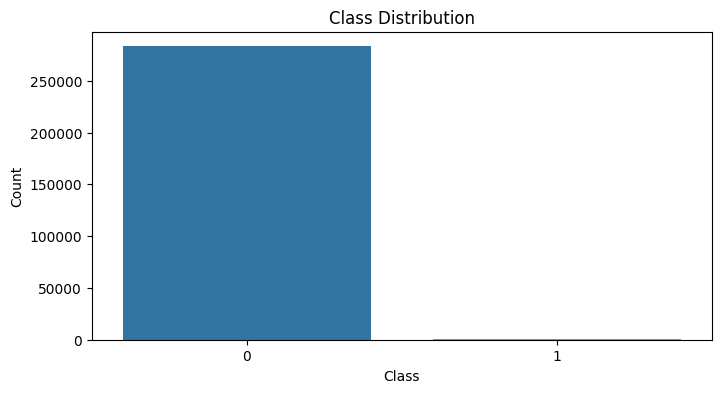

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## **Normalization**

In [ ]:
#Importing StandarScaler to perform Normalization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data['normalized_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

### **Dropping irrelevant Features**

In [ ]:
data.drop(columns=['Amount'], axis=1, inplace=True)

In [ ]:
data.drop(columns=['Time'], axis=1, inplace=True)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [ ]:
# Splitting the Features and Target
X = data.drop(['Class'], axis=1)
Y = data['Class']

In [ ]:
Y.value_counts() #Before Oversampling

0    283253
1       473
Name: Class, dtype: int64

## **Oversampling**

In [ ]:
#Importing SMOTE to perform Oversampling
from imblearn.over_sampling import SMOTE

In [ ]:
# Oversampling by using SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [ ]:
Y_resampled.value_counts() #After Oversampling

0    283253
1    283253
Name: Class, dtype: int64

## **Split the data into Train & Test**

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(453204, 29) (113302, 29)


## **Model Selection**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
models = {
'Logistic Regression': LogisticRegression(),
'Decision Tree': DecisionTreeClassifier(),
'Random Forest': RandomForestClassifier(random_state=42)
}

### **Models Evaluation**

### In this project, we'll use three different models such as **Logistic Regression, Decision Tree, Random Forest** to predict whether a credit card transaction is fraudulent or genuine. To measure how well these models work, we'll use metrics like **accuracy, precision, recall, and F1-score**. These metrics will help us understand how effective our models are at identifying fraud and genuine transactions

In [ ]:
#Creating an empty list
results = []

In [ ]:
# Loop through each model
for model_name, model in models.items():

  model.fit(X_train, Y_train) # Train the model

  Y_pred = model.predict(X_test) # Predict on the test data

  accuracy = accuracy_score(Y_test, Y_pred) # Calculate performance metrics
  precision = precision_score(Y_test, Y_pred)
  recall = recall_score(Y_test, Y_pred)
  f1 = f1_score(Y_test, Y_pred)

  results.append((model_name, accuracy, precision, recall, f1)) # Store metrics in results list

In [ ]:
# Create a DataFrame to store results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.943796,0.972460,0.913844,0.942241
1,Decision Tree,0.998173,0.997453,0.998909,0.998180
2,Random Forest,0.999894,0.999789,1.000000,0.999894


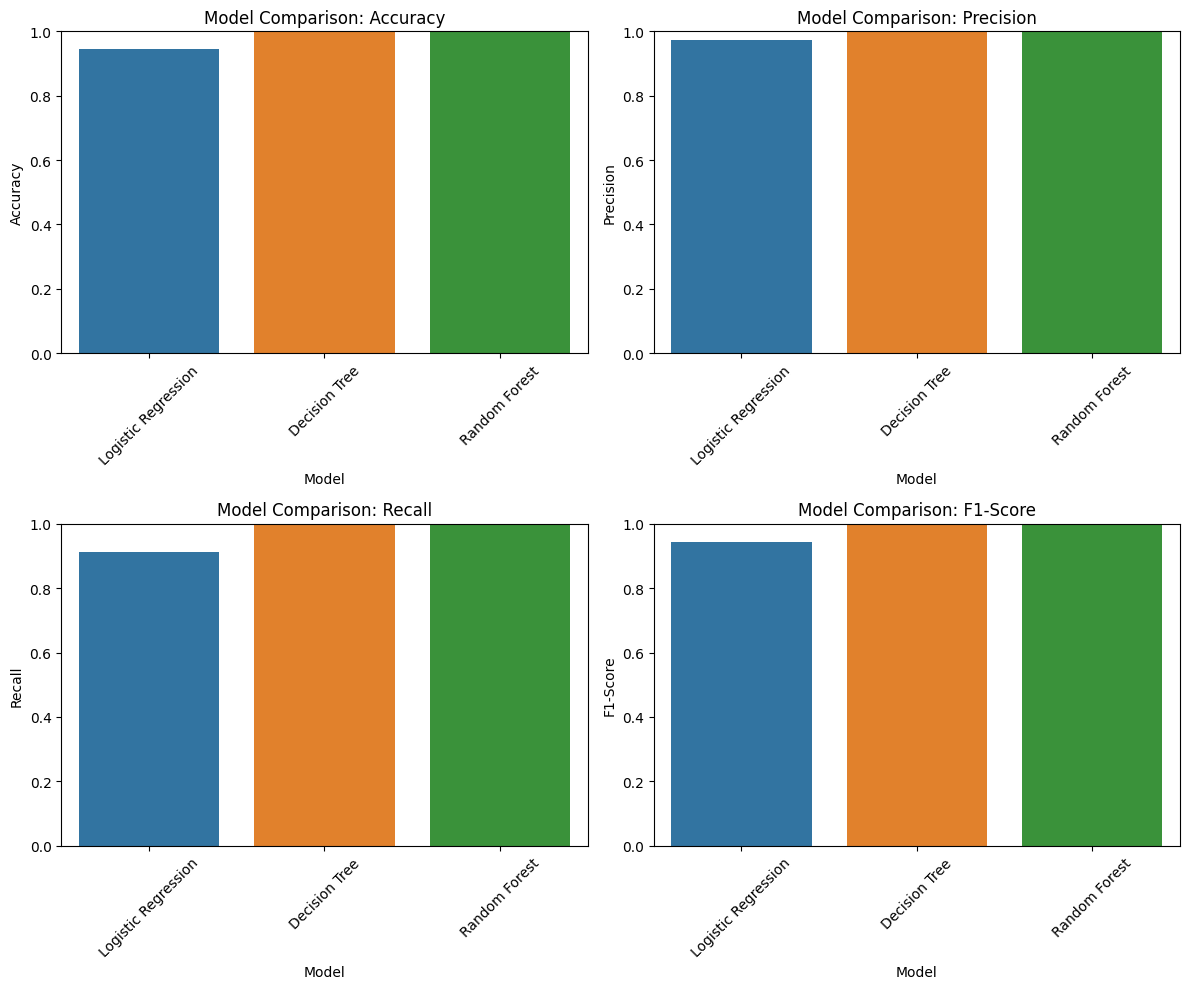

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Loop through each metric and subplot
for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)  # Calculate row and column indices
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[row, col])
    axes[row, col].set_title(f'Model Comparison: {metric}')
    axes[row, col].set_ylim([0, 1])
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_xticklabels(results_df['Model'], rotation=45)

# Move plt.tight_layout() and plt.show() outside of the loop
plt.tight_layout()
plt.show()

### From our extensive model evaluation and visualization, it's evident that the **Random Forest model** outperforms the others. It showcases exceptional accuracy, precision, recall, and F1-score, making it the top choice for credit card fraud detection. Our results clearly highlight its effectiveness in distinguishing fraudulent transactions, ensuring financial security.

# **Project Summary**

### This project is all about finding tricky fake transactions using machine learning. It's like putting puzzle pieces together. First, we make sure the data is good to use, cleaning up anything messy. Then, we handle the challenge of having more of one type of data than the other.This helps our computer learn better. Next, we pick three smart computer methods: **Logistic Regression, Decision Tree, and Random Forest**. We teach them using training data and see how good they are at catching the tricky stuff. We measure them using scores like **accuracy, precision, recall, and F1-score**. Making colorful graphs helps us see which one is strongest in each area.

### **To sum up, this project covers a lot: checking data, fixing imbalances, teaching smart computers, and seeing how well they work. All of this helps us catch fake credit card moves and makes our financial actions more secure.**